<a href="https://colab.research.google.com/github/faranak5171/Deep-Learning-projects/blob/master/mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

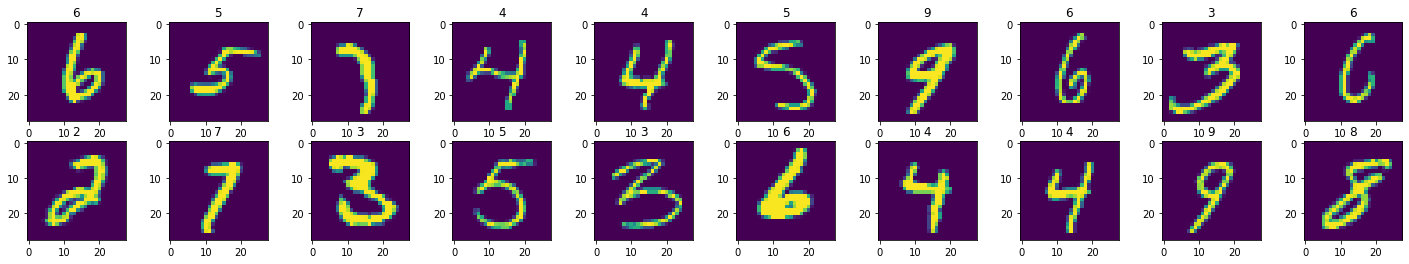

In [17]:
images, labels = next(iter(trainloader))
fig = plt.figure(figsize=(25,4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx+1)
  ax.imshow(images[idx].numpy().squeeze())
  ax.set_title(str(labels[idx].item()))

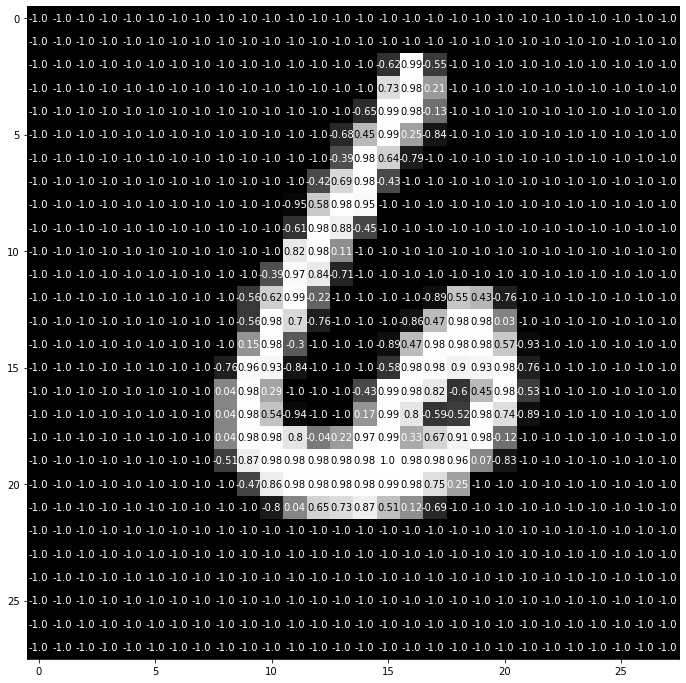

In [37]:
#View an image in more details
img = images[2].numpy().squeeze()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot()
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max() / 2.5
for x in range(width):
  for y in range(height):
    val = round(img[x][y],2) if img[x][y] != 0 else 0
    ax.annotate(str(val),xy=(y,x),
                horizontalalignment='center',
                verticalalignment='center',
                color='white' if img[x][y]<thresh else 'black')

In [6]:
n_input = 784
n_hidden1 = 128
n_hidden2 = 64
n_out = 10
model = nn.Sequential(nn.Linear(n_input, n_hidden1), 
                    nn.ReLU(),
                    nn.Linear(n_hidden1, n_hidden2),
                    nn.ReLU(),
                    nn.Linear(n_hidden2,n_out),
                    nn.LogSoftmax(dim=1))
optimizer = optim.SGD(model.parameters(), lr=0.003)
criterion = nn.NLLLoss()

In [18]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss : {running_loss/len(trainloader)}")

Training loss : 1.8996403202065018
Training loss : 0.8880186340193759
Training loss : 0.5398084092368958
Training loss : 0.4347945497806138
Training loss : 0.38623283069525194


In [19]:
images, labels = next(iter(trainloader))

img = images[1].view(1,784)

with torch.no_grad():
    logits = model.forward(img)

ps = F.softmax(logits, dim=1)

Text(0.5, 1.0, 'The model predicts the selected digit as 6')

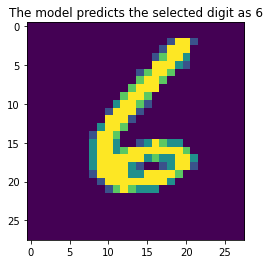

In [20]:
plt.imshow(images[1].squeeze().numpy())
plt.title(f"The model predicts the selected digit as {torch.argmax(ps)}")